<a href="https://colab.research.google.com/github/RaianaSeixas/Portfolio/blob/main/Machine-Learning_sklearn/01_Credit_Score_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There's a huge discussion going on regarding credit score vs loan approval. The team asked for you help on that matter. Unfortunately, the company didn't care a lot about data all these years so you don't have much data to explore. After a lot of investigation, the team managed to come up with a dataset with very little information about the clients your company had so far (extracted from old API request logs).
Given this data sample:
- Perform an Exploratory Data Analysis (EDA) of the dataset
- Design and code a model that would be able to compute the estimated probability of a given score ***x*** being approved.


----------
Author: Raiana Roland Seixas
08/16/2022

# Data load & Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
!git clone https://github.com/RaianaSeixas/Machine_Learning_Datasets
%cd Machine_Learning_Datasets

Cloning into 'Machine_Learning_Datasets'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.
/content/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets/Machine_Learning_Datasets


In [ ]:
df=pd.read_csv('Credit_score_data.csv')

In [ ]:
df.head()

,name,email,score,approved
0,Leuschke,stefania@hoeger.info,636,0
1,Funk,herb@heidenreich-schowalter.name,638,1
2,Anderson,davis@schultz.com,778,0
3,Bartoletti,yong@parker.com,333,0
4,Satterfield,pamela.larson@oconner.org,357,0


# Exploratory Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      800 non-null    object
 1   email     800 non-null    object
 2   score     800 non-null    int64 
 3   approved  800 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.1+ KB


There is no missing data.

In [ ]:
df.describe()

,score,approved
count,800.000000,800.000000
mean,614.207500,0.495000
std,139.086397,0.500288
min,300.000000,0.000000
25%,524.500000,0.000000
50%,628.500000,0.000000
75%,724.250000,1.000000
max,840.000000,1.000000


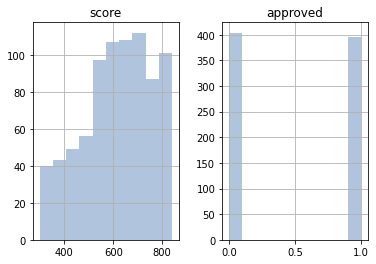

In [ ]:
# Frequency distribution of variables
df.hist(color='lightsteelblue');

Classes (0 or 1) are balanced.

Score frequency distribution is skewed to the left with the mean smaller then the median.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot variable score')

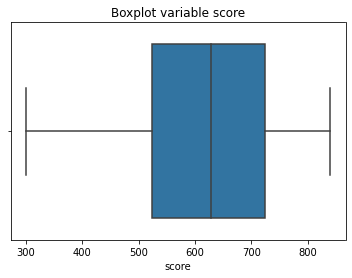

In [ ]:
sns.boxplot(df['score'])
plt.title('Boxplot variable score')

In [ ]:
# Score distribution of approved aplications

df[df['approved']==1].describe()

,score,approved
count,396.000000,396.0
mean,673.590909,1.0
std,98.475901,0.0
min,499.000000,1.0
25%,588.000000,1.0
50%,679.500000,1.0
75%,764.000000,1.0
max,840.000000,1.0


In [ ]:
# Score distribution of not approved aplications

df[df['approved']==0].describe()

,score,approved
count,404.00000,404.0
mean,556.00000,0.0
std,148.28142,0.0
min,300.00000,0.0
25%,433.00000,0.0
50%,561.00000,0.0
75%,676.75000,0.0
max,810.00000,0.0


Text(0.5, 1.0, 'Boxplot score comparison between the 2 classes')

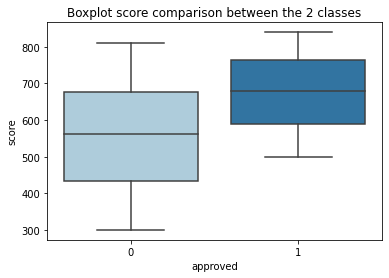

In [ ]:
sns.boxplot(y = 'score', x = 'approved', data = df,  palette="Paired")
plt.title('Boxplot score comparison between the 2 classes')

We can observe that no person with score less than 499 had the loan approved, even though a considerable number of people with score between 700 and 810 had the loan not approved, suggesting that there are other variables not present in the dataset that are being considered in this decision.

# Predictive Model

Since the proposed goal is to predicted the approval probability, for the sake of simplicity I decided to solve the problem using logistc regression. 
Other methods suitable for binary classification such as randon forest, xgboost, ANN, SVM, etc., could be used in conjunction with the calculation of Logloss, Brier Score or calibration plot to predict the approval probability.

In [ ]:
# Train and test split (85% of data for trainning and validation, 15% of the data for testing)

X=df['score']
y=df['approved']
X_train_o, X_test_o, y_train, y_test = \
    train_test_split(X, y, test_size=0.15,  random_state=None, shuffle=True) 

In [ ]:
# Variable scaling

def scaling(data):
  data_res=data.values.reshape(-1,1)
  scaler= MinMaxScaler().fit(data_res)
  data_scaled= scaler.transform(data_res)
  return data_scaled

X_train=scaling(X_train_o)
X_test=scaling(X_test_o)

In [ ]:
# Model

#lr= LogisticRegression( random_state=0) # create model
lr= LogisticRegression(solver='lbfgs', random_state=None) # create model
lr.fit(X_train, y_train) # training model
y_pred = lr.predict(X_test) #prediction step
y_pred_train = lr.predict(X_train)  #prediction train step

In [ ]:
# Model performance evaluation

print('Trainning dataset')
print()
print(" Acurácia: {0:.5f}".format(accuracy_score(y_train, y_pred_train)))
print(" Precisão: {0:.5f}".format(precision_score(y_train, y_pred_train)))
print("   Recall: {0:.5f}".format(recall_score(y_train, y_pred_train)))
print(" f1 score: {0:.5f}".format(f1_score(y_train, y_pred_train)))
print()
print('Test dataset')
print()
print(" Acurácia: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print(" Precisão: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   Recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))
print()

Trainning dataset

 Acurácia: 0.63382
 Precisão: 0.62717
   Recall: 0.64392
 f1 score: 0.63543

Test dataset

 Acurácia: 0.70000
 Precisão: 0.67164
   Recall: 0.76271
 f1 score: 0.71429



## Solver Optimization 
Logistic Regression, don't really have critical hyperparameters to tune. The solver though, can have some impact in some cases.

In [ ]:
param_grid = {
    'solver': ['lbfgs', 'sag', 'saga','newton-cg', 'liblinear' ],
}

CV_lr = GridSearchCV(
    lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1', 
    verbose=10,
    n_jobs=1,
)
CV_lr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START solver=lbfgs................................................
[CV 1/5; 1/5] END .................solver=lbfgs;, score=0.580 total time=   0.0s
[CV 2/5; 1/5] START solver=lbfgs................................................
[CV 2/5; 1/5] END .................solver=lbfgs;, score=0.623 total time=   0.0s
[CV 3/5; 1/5] START solver=lbfgs................................................
[CV 3/5; 1/5] END .................solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5; 1/5] START solver=lbfgs................................................
[CV 4/5; 1/5] END .................solver=lbfgs;, score=0.625 total time=   0.0s
[CV 5/5; 1/5] START solver=lbfgs................................................
[CV 5/5; 1/5] END .................solver=lbfgs;, score=0.657 total time=   0.0s
[CV 1/5; 2/5] START solver=sag..................................................
[CV 1/5; 2/5] END ...................solver=sag;,

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']},
             scoring='f1', verbose=10)

In [ ]:
CV_lr.best_params_

{'solver': 'liblinear'}

In [ ]:
y_pred_ = CV_lr.predict(X_test) #prediction step

In [ ]:
print('Test dataset')
print()
print(" Acurácia: {0:.5f}".format(accuracy_score(y_test, y_pred_)))
print(" Precisão: {0:.5f}".format(precision_score(y_test, y_pred_)))
print("   Recall: {0:.5f}".format(recall_score(y_test, y_pred_)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred_)))
print()

Test dataset

 Acurácia: 0.70000
 Precisão: 0.67164
   Recall: 0.76271
 f1 score: 0.71429



In [ ]:
confusion_matrix(y_test,y_pred_)

array([[39, 22],
       [14, 45]])

It can be observed that the solver did not show a significative impact on the results. The f1-score of the model is between 60 and 70% for most seeds. In most cases, the recall is higher than the precision, indicating that there is more false positive than false negative (what could be expected by observing the boxplot for the score variable by class). In other words, the model predicts better people that will have the loan application declined.


## Forcast

### Probability of loan approval according to the model for test dataset

In [ ]:
y_prob_pred = lr.predict_proba(X_test) # returns for each point an array  with the probability of belonging to each of the classes
y_prob_pred = y_prob_pred[:,1] # get the probability of being approved 

df_test=pd.DataFrame({'Score': X_test_o.tolist(),
                      'Approved': y_test.tolist()})

df_test['Predicted Approval Probability']=y_prob_pred.tolist()
df_test

,Score,Approved,Predicted Approval Probability
0,762,0,0.698761
1,421,0,0.240478
2,685,0,0.596696
3,802,1,0.745548
4,594,1,0.465125
...,...,...,...
115,790,1,0.732026
116,802,1,0.745548
117,635,0,0.524908
118,444,0,0.265858


### Function to obtain the probability and the odds for a given score

In [ ]:
def prediction(x):
  x_scaled = (x - X.min())/ (X.max() - X.min())
  prob_approval=lr.predict_proba([[x_scaled]])[0][1]
  prob_fail=lr.predict_proba([[x_scaled]])[0][0]
  odds= prob_approval/prob_fail
  print('Approval Probability: ',round(prob_approval,4))
  print('Approval Odds: ',round(odds,4))
  #return prob_approval,odds
  return None

In [ ]:
# For score = 480
prediction(480)

Approval Probability:  0.308
Approval Odds:  0.4451


In [ ]:
# For score = 675
prediction(675)

Approval Probability:  0.5806
Approval Odds:  1.3843


### Visualization of model behavior in terms of probability values for values from 281 to 998.

In [ ]:
X1=[item for item in range(281, 998+1)] # creating dataset
#X1_=np.array(X1).reshape(-1,1)
X1_scaled=scaling(pd.Series(X1)) #scaling
y1 = lr.predict_proba(X1_scaled) # probabily of approval given the model 

In [ ]:
y1

array([[0.86491269, 0.13508731],
       [0.86439987, 0.13560013],
       [0.86388541, 0.13611459],
       ...,
       [0.21814939, 0.78185061],
       [0.2174029 , 0.7825971 ],
       [0.21665826, 0.78334174]])

In [ ]:
i=0
y=[]
for i in y1:
  y.append(i[1])

Text(0, 0.5, 'Probability')

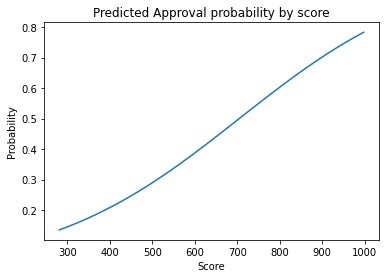

In [ ]:
plt.plot(X1,y)
plt.title('Predicted Approval probability by score')
plt.xlabel('Score')
plt.ylabel('Probability')

## Conclusions 

The proposed model is able to provide a probability of approval or not of a loan based on the person credit score. The class prediction presents an error for approximately 30 and 40% of the cases. Evaluating loan approval considering only one variable is clearly a limitation. Also the dataset is small. Thus is suggest collect more data and evaluate other variables that may have impact in the response, in order to improve the model reliability.